# **Lab Practice code for AI + Robotics**

**4.2.2:Problem Statement 1: An autonomous robot that must navigate a room without hitting obstacles.**


In [9]:
#Step-1: import python libraries
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Step-2: Define the environment grid
grid_size = 10
# Step-3: Example obstacle positions
obstacle_positions = [(2, 3), (5, 7), (8, 1)]

# Step-4: Generate training data
def generate_training_data(num_samples):
    training_data = []
    for _ in range(num_samples):
        # Step-5: Randomly position the robot in the grid
        robot_position = np.random.randint(0, grid_size, size=(2,))
        #Step-6: Generate the environment grid with obstacles
        grid = np.zeros((grid_size, grid_size))
        for obstacle_pos in obstacle_positions:
            grid[obstacle_pos] = 1
        # Step-7: Create a one-hot encoded vector representing the robot's surroundings
        robot_surroundings = np.zeros((grid_size,))
        robot_surroundings[robot_position[0]] = 1
        robot_surroundings[robot_position[1]] = 1
        # Step-8: Determine the optimal direction to move (avoiding obstacles)
        optimal_direction = get_optimal_direction(robot_position)
        # Step9: Add the training sample to the training data
        training_data.append((robot_surroundings, optimal_direction))
    return training_data

# Step-10: Function to determine the optimal direction to move
def get_optimal_direction(robot_position):
    # Determine the optimal direction based on the obstacle positions
    # For simplicity, let's say the optimal direction is always to the right if no obstacle is present
    if (robot_position[0], robot_position[1] + 1) not in obstacle_positions and robot_position[1] + 1 < grid_size:
        return 1  # Move right
    else:
        return 0  # Move up (or stay in place)

#Step-11: Example of generating 100 training samples
num_samples = 100
training_data = generate_training_data(num_samples)

# Step-12: Prepare the training data
X_train = np.array([sample[0] for sample in training_data])
y_train = np.array([sample[1] for sample in training_data])

# Step-13: Define the neural network model
model = models.Sequential([
    layers.Dense(64, activation='relu', input_shape=(grid_size,)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# Step-14: Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Step-15: Train the model
model.fit(X_train, y_train, epochs=10, batch_size=32)

# Step-16: Test the model with a new input (e.g., current robot surroundings)
# Note: In a real application, you would use the trained model to make predictions based on the robot's actual surroundings
test_input = np.zeros((grid_size,))
test_input[3] = 1  # Example input: robot surrounded by obstacles on the right
prediction = model.predict(np.array([test_input]))
print(f"Predicted optimal direction: {prediction}")


Epoch 1/10
4/4 [==============================] - 2s 9ms/step - loss: 0.6078 - accuracy: 0.8800
Epoch 2/10
4/4 [==============================] - 0s 6ms/step - loss: 0.5675 - accuracy: 0.8800
Epoch 3/10
4/4 [==============================] - 0s 10ms/step - loss: 0.5308 - accuracy: 0.8800
Epoch 4/10
4/4 [==============================] - 0s 8ms/step - loss: 0.4972 - accuracy: 0.8800
Epoch 5/10
4/4 [==============================] - 0s 7ms/step - loss: 0.4635 - accuracy: 0.8800
Epoch 6/10
4/4 [==============================] - 0s 7ms/step - loss: 0.4360 - accuracy: 0.8800
Epoch 7/10
4/4 [==============================] - 0s 7ms/step - loss: 0.4073 - accuracy: 0.8800
Epoch 8/10
4/4 [==============================] - 0s 7ms/step - loss: 0.3847 - accuracy: 0.8800
Epoch 9/10
4/4 [==============================] - 0s 7ms/step - loss: 0.3640 - accuracy: 0.8800
Epoch 10/10
1/1 [==============================] - 0s 101ms/step
Predicted optimal direction: [[0.8111862]]


**Problem statement 2: A service robot needs to respond to human gestures.**

In [10]:
!pip install torch torchvision
#Step-1import python libraries

import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np

# Step-2: Sample dataset (replace with your actual dataset)
num_samples = 1000
sequence_length = 10
num_classes = 5
input_size = 3  # Assuming 3D gestures
hidden_size = 64

# Step-3: Generate sample data
X_train = torch.randn(num_samples, sequence_length, input_size)
y_train = torch.randint(0, num_classes, (num_samples,))

# Step-4: Define the RNN model
class RNN(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(RNN, self).__init__()
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h0 = torch.zeros(1, x.size(0), self.hidden_size)
        out, _ = self.rnn(x, h0)
        out = self.fc(out[:, -1, :])  # Use only the last output
        return out

# Step-5: Instantiate the model
model = RNN(input_size, hidden_size, num_classes)

# Step-6: Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Step-7: Training loop
num_epochs = 5
for epoch in range(num_epochs):
    optimizer.zero_grad()
    outputs = model(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}")

# Step-8: Test the model (replace X_test with your test data)
X_test = torch.randn(1, sequence_length, input_size)
with torch.no_grad():
    output = model(X_test)
    predicted_class = torch.argmax(output)
    print(f"Predicted class: {predicted_class}")


  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21

**6.2.2:Implement the Q-learning algorithm for a robotic application in Python.**


In [2]:
# Step-1: Import python libraries

import numpy as np

# Step 2: Define the environment
grid_size = 5
num_actions = 4  # Up, Down, Left, Right
start_state = (0, 0)
goal_state = (grid_size - 1, grid_size - 1)
obstacles = [(1, 1), (2, 2), (3, 3)]

# Step 3: Initialize the Q-table
q_table = np.zeros((grid_size, grid_size, num_actions))

# Step 4: Set hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.6  # Discount factor
epsilon = 0.1  # Exploration vs. exploitation factor

# Step 5: Define reward and transition functions
def get_reward(state):
    if state == goal_state:
        return 10
    elif state in obstacles:
        return -10
    else:
        return -1

def get_next_state(state, action):
    x, y = state
    if action == 0:   # Move up
        next_state = (max(x - 1, 0), y)
    elif action == 1:   # Move down
        next_state = (min(x + 1, grid_size - 1), y)
    elif action == 2:   # Move left
        next_state = (x, max(y - 1, 0))
    else:   # Move right
        next_state = (x, min(y + 1, grid_size - 1))
    return next_state

# Step 6: Training loop
num_episodes = 1000
for episode in range(num_episodes):
    state = start_state
    done = False
    while not done:
        # Exploration vs. exploitation
        if np.random.uniform(0, 1) < epsilon:
            action = np.random.randint(num_actions)
        else:
            action = np.argmax(q_table[state])

        next_state = get_next_state(state, action)
        reward = get_reward(next_state)

        # Update Q-value
        q_table[state][action] += alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state][action])

        state = next_state
        if state == goal_state or state in obstacles:
            done = True

# Step 7: Testing the trained agent and print the output
state = start_state
path = [state]
done = False
while not done:
    action = np.argmax(q_table[state])
    state = get_next_state(state, action)
    path.append(state)
    if state == goal_state or state in obstacles:
        done = True

print("Path taken:", path)


Path taken: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (1, 4), (2, 4), (3, 4), (4, 4)]


**5.3.1:Practical Session: Train a CNN using Real-World Data for Object Recognition**


In [1]:
# Step-1: Import python libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Step-2: Data Preprocessing
def preprocess_data(images, labels):
    # Normalize images
    images = images / 255.0

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

    # Step-3: Data augmentation for the training set
    train_datagen = ImageDataGenerator(
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    return train_datagen, X_train, X_test, y_train, y_test

# Step-4: Load your dataset (this is just a placeholder; you'll need to load your actual data)
images = np.random.rand(1000, 224, 224, 3)  # Example image data
labels = np.random.randint(2, size=(1000, 1))  # Example labels

train_datagen, X_train, X_test, y_train, y_test = preprocess_data(images, labels)

# Step-5: Model Training
def build_and_train_model(X_train, y_train, train_datagen):
    # Load the VGG16 network, ensuring the head FC layers are left off
    baseModel = VGG16(weights="imagenet", include_top=False, input_shape=(224, 224, 3))

    # Freeze the base model layers
    for layer in baseModel.layers:
        layer.trainable = False

    # Add custom layers on top of VGG16
    headModel = baseModel.output
    headModel = Flatten(name="flatten")(headModel)
    headModel = Dense(512, activation="relu")(headModel)
    headModel = Dense(1, activation="sigmoid")(headModel)  # Use 'softmax' for multiclass

    model = Model(inputs=baseModel.input, outputs=headModel)

    # Step-6: Compile the model
    opt = Adam(lr=1e-4)
    model.compile(loss="binary_crossentropy", optimizer=opt, metrics=["accuracy"])  # Use 'categorical_crossentropy' for multiclass

    # Train the model
    H = model.fit(
        train_datagen.flow(X_train, y_train, batch_size=32),
        steps_per_epoch=len(X_train) // 32,
        epochs=25,
        validation_data=(X_test, y_test)
    )

    return model, H

model, H = build_and_train_model(X_train, y_train, train_datagen)

#Step-7:  Model Evaluation
def evaluate_model(model, X_test, y_test):
    # Make predictions on the testing set
    predictions = model.predict(X_test, batch_size=32)

    # For binary classification, determine the index of the label with the corresponding largest predicted probability
    predictions = np.argmax(predictions, axis=1)

    # Show a nicely formatted classification report
    print(classification_report(y_test, predictions))

    # Compute the confusion matrix and use it to derive the raw accuracy, sensitivity, and specificity
    cm = confusion_matrix(y_test, predictions)
    total = sum(sum(cm))
    acc = (cm[0, 0] + cm[1, 1]) / total
    sensitivity = cm[0, 0] / (cm[0, 0] + cm[0, 1])
    specificity = cm[1, 1] / (cm[1, 0] + cm[1, 1])

    # Return the performance metrics
    return acc, sensitivity, specificity

# Step-8: Evaluate the model
accuracy, sensitivity, specificity = evaluate_model(model, X_test, y_test)
print(f"Accuracy: {accuracy}, Sensitivity: {sensitivity}, Specificity: {specificity}")


58889256/58889256 [==============================] - 1s 0us/step


Epoch 1/25
25/25 [==============================] - 666s 27s/step - loss: 1.3198 - accuracy: 0.5150 - val_loss: 0.6934 - val_accuracy: 0.4700
Epoch 2/25
25/25 [==============================] - 649s 26s/step - loss: 0.6930 - accuracy: 0.5200 - val_loss: 0.6935 - val_accuracy: 0.4700
Epoch 3/25
25/25 [==============================] - 660s 27s/step - loss: 0.6929 - accuracy: 0.5200 - val_loss: 0.6936 - val_accuracy: 0.4700
Epoch 4/25
25/25 [==============================] - 659s 27s/step - loss: 0.6929 - accuracy: 0.5200 - val_loss: 0.6937 - val_accuracy: 0.4700
Epoch 5/25
25/25 [==============================] - 663s 27s/step - loss: 0.6928 - accuracy: 0.5200 - val_loss: 0.6939 - val_accuracy: 0.4700
Epoch 6/25
25/25 [==============================] - 659s 27s/step - loss: 0.6928 - accuracy: 0.5200 - val_loss: 0.6940 - val_accuracy: 0.4700
Epoch 7/25
25/25 [==============================] - 653s 26s/step - loss: 0.6927 - accuracy: 0.5200 - val_loss: 0.6940 - val_accuracy: 0.4700
Epoch 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**6.3.1:Practical Session: Create and Train RL Models for Robotic Tasks**


In [3]:
# Step 1: import the python libraries
import numpy as np
import random

# Step 2: Define the environment
class GridWorld:
    def __init__(self, size, start, goal, obstacles):
        self.size = size
        self.start = start
        self.goal = goal
        self.obstacles = obstacles
        self.state = start

    def reset(self):
        self.state = self.start
        return self.state

    def step(self, action):
        x, y = self.state
        if action == 'up':
            x = max(0, x - 1)
        elif action == 'down':
            x = min(self.size - 1, x + 1)
        elif action == 'left':
            y = max(0, y - 1)
        elif action == 'right':
            y = min(self.size - 1, y + 1)

        new_state = (x, y)
        if new_state in self.obstacles:
            reward = -1
            done = True
        elif new_state == self.goal:
            reward = 0
            done = True
        else:
            reward = -0.1
            done = False

        self.state = new_state
        return new_state, reward, done

#Step 3:Initialize parameters
size = 5
start = (0, 0)
goal = (4, 4)
obstacles = [(1, 1), (2, 2), (3, 3)]
actions = ['up', 'down', 'left', 'right']
q_table = np.zeros((size, size, len(actions)))
learning_rate = 0.1
discount_factor = 0.9
epsilon = 0.1
num_episodes = 1000

#Step 4:Train the model
env = GridWorld(size, start, goal, obstacles)
for episode in range(num_episodes):
    state = env.reset()
    done = False

    while not done:
        if random.uniform(0, 1) < epsilon:
            action = random.choice(actions)
        else:
            action_index = np.argmax(q_table[state])
            action = actions[action_index]

        new_state, reward, done = env.step(action)
        old_value = q_table[state + (actions.index(action),)]
        next_max = np.max(q_table[new_state])

        # Update Q-value
        new_value = (1 - learning_rate) * old_value + learning_rate * (reward + discount_factor * next_max)
        q_table[state + (actions.index(action),)] = new_value
        state = new_state

#Step 5: Test the trained model and print the output
state = env.reset()
done = False
while not done:
    action_index = np.argmax(q_table[state])
    action = actions[action_index]
    state, _, done = env.step(action)
    print(f"Current state: {state} Action: {action}")


Current state: (1, 0) Action: down
Current state: (2, 0) Action: down
Current state: (3, 0) Action: down
Current state: (4, 0) Action: down
Current state: (4, 1) Action: right
Current state: (4, 2) Action: right
Current state: (4, 3) Action: right
Current state: (4, 4) Action: right


**6.3.2: Demonstrating creating a custom simulation environment for the robot to find a path from the start to the goal position while avoiding obstacles**


In [6]:
#Step-1: Import python libraries.
import numpy as np
# Step 2: Define the grid world environment
class GridWorld:
    def __init__(self, size, start, goal, obstacles):
        self.size = size
        self.start = start
        self.goal = goal
        self.obstacles = obstacles
        self.state = start

    def reset(self):
        self.state = self.start
        return self.state

    def step(self, action):
        # Calculate the next state based on the current state and action
        x, y = self.state
        if action == 'up' and x > 0:
            x -= 1
        elif action == 'down' and x < self.size - 1:
            x += 1
        elif action == 'left' and y > 0:
            y -= 1
        elif action == 'right' and y < self.size - 1:
            y += 1

        # Check if the new state is an obstacle
        if (x, y) in self.obstacles:
            reward = -1  # Penalty for hitting an obstacle
            done = True
        elif (x, y) == self.goal:
            reward = 0  # Reward for reaching the goal
            done = True
        else:
            reward = -0.1  # Small penalty for each step taken
            done = False

        self.state = (x, y)
        return self.state, reward, done

# Step 3: Define the size of the grid, start position, goal position, and obstacles
size = 5
start = (0, 0)
goal = (4, 4)
obstacles = [(1, 1), (3, 3), (2, 2)]

# Step 4: Create the grid world
env = GridWorld(size, start, goal, obstacles)

# Step 5:Interacting with the environment for example and print the output
state = env.reset()
done = False
while not done:
    action = np.random.choice(['up', 'down', 'left', 'right'])
    next_state, reward, done = env.step(action)
    print(f"State: {state} Action: {action} -> Next State: {next_state} Reward: {reward}")
    state = next_state


State: (0, 0) Action: up -> Next State: (0, 0) Reward: -0.1
State: (0, 0) Action: left -> Next State: (0, 0) Reward: -0.1
State: (0, 0) Action: left -> Next State: (0, 0) Reward: -0.1
State: (0, 0) Action: left -> Next State: (0, 0) Reward: -0.1
State: (0, 0) Action: right -> Next State: (0, 1) Reward: -0.1
State: (0, 1) Action: up -> Next State: (0, 1) Reward: -0.1
State: (0, 1) Action: up -> Next State: (0, 1) Reward: -0.1
State: (0, 1) Action: left -> Next State: (0, 0) Reward: -0.1
State: (0, 0) Action: right -> Next State: (0, 1) Reward: -0.1
State: (0, 1) Action: left -> Next State: (0, 0) Reward: -0.1
State: (0, 0) Action: up -> Next State: (0, 0) Reward: -0.1
State: (0, 0) Action: down -> Next State: (1, 0) Reward: -0.1
State: (1, 0) Action: up -> Next State: (0, 0) Reward: -0.1
State: (0, 0) Action: up -> Next State: (0, 0) Reward: -0.1
State: (0, 0) Action: down -> Next State: (1, 0) Reward: -0.1
State: (1, 0) Action: up -> Next State: (0, 0) Reward: -0.1
State: (0, 0) Action

**7.3.1 :Practical Hands-on: GANs to Create New Designs for Robotic Components or Systems**


1/1 [==============================] - 0s 201ms/step


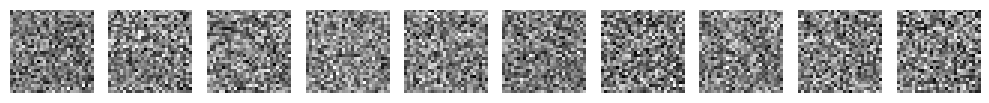

In [7]:
# Step 1: Install TensorFlow and other libraries
!pip install tensorflow matplotlib

import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np

#Step 2: Define the generator model
def build_generator(z_dim):
    model = tf.keras.Sequential()
    model.add(layers.Dense(128, input_dim=z_dim))
    model.add(layers.LeakyReLU(alpha=0.01))
    model.add(layers.Dense(28*28*1, activation='tanh'))
    model.add(layers.Reshape((28, 28, 1)))
    return model

# Step 3: Define the discriminator model
def build_discriminator(img_shape):
    model = tf.keras.Sequential()
    model.add(layers.Flatten(input_shape=img_shape))
    model.add(layers.Dense(128))
    model.add(layers.LeakyReLU(alpha=0.01))
    model.add(layers.Dense(1, activation='sigmoid'))
    return model

# Step 4: Define the GAN model
def build_gan(generator, discriminator):
    model = tf.keras.Sequential()
    model.add(generator)
    model.add(discriminator)
    return model

# Step 5:Model hyperparameters
z_dim = 100
img_shape = (28, 28, 1)

# Step 6: Build and compile the discriminator
discriminator = build_discriminator(img_shape)
discriminator.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

# Step 7: Build the generator
generator = build_generator(z_dim)

# Keep the discriminator's parameters constant for the generator training
discriminator.trainable = False

# Step 8: Build and compile the GAN model with a fixed discriminator to train the generator
gan = build_gan(generator, discriminator)
gan.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam())

# Step 9: Training loop and display some randomly generated images
# Function to display generated images
def display_generated_images(generator, z_dim, examples=10):
    noise = np.random.normal(0, 1, (examples, z_dim))
    generated_images = generator.predict(noise)
    generated_images = generated_images.reshape(examples, 28, 28)
    plt.figure(figsize=(10, 10))
    for i in range(examples):
        plt.subplot(1, examples, i+1)
        plt.imshow(generated_images[i], interpolation='nearest', cmap='gray_r')
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Display some randomly generated images
display_generated_images(generator, z_dim)


**7.3.2:Optimizing the parameters of a robot's PID controller for precise position control using PSO technique.**


In [10]:
# Step 1: Install the pyswarm library if you haven't already
!pip install pyswarm

import numpy as np
from pyswarm import pso

# Step 2: Objective function (fitness function)
def pid_objective(params):
    Kp, Ki, Kd = params
    # Replace the following line with your actual simulation code
    simulated_response = 0.0 # Replace with the actual simulated response
    # Evaluate the performance (e.g., tracking error, settling time)
    # Return a fitness score (lower is better)
    target_value = 0.0
    error = target_value - simulated_response
    fitness = np.sum(error**2)
    return fitness

# Step 3: Define parameter bounds (lower and upper bounds)
low_b=[0.1, 0.01, 0.01]
upp_b=[10.0, 1.0, 1.0]

# Step 4: Optimize PID parameters using PSO
best_params, _ = pso(pid_objective, lb=low_b, swarmsize=10, maxiter=100, ub=upp_b)

# Step 5: Print the optimized parameters
print("Optimized PID parameters:")
print(f"Kp: {best_params[0]}, Ki: {best_params[1]}, Kd: {best_params[2]}")


  Preparing metadata (setup.py) ... done
  Created wheel for pyswarm: filename=pyswarm-0.6-py3-none-any.whl size=4464 sha256=ca6a09475bfa61881cb466ed21f7a392bd9462178960e70ee4774d6080a81654
  Stored in directory: /root/.cache/pip/wheels/71/67/40/62fa158f497f942277cbab8199b05cb61c571ab324e67ad0d6
Successfully built pyswarm
Stopping search: maximum iterations reached --> 100
Optimized PID parameters:
Kp: 5.186954179135864, Ki: 0.8968700757533777, Kd: 0.8585035052471608


**8.2.2:Integration of NLP Algorithms for Recognizing and Processing Voice Commands**


In [13]:
# Step 1:Install the speech recognition library
!pip install SpeechRecognition

import speech_recognition as sr

# Step 2 :Initialize the recognizer
r = sr.Recognizer()

# Step 3: Function to recognize speech from an audio file
def recognize_speech_from_file(audio_file):
    with sr.AudioFile(audio_file) as source:
        audio_data = r.record(source)
        try:
            # Recognize speech using Google's speech recognition
            text = r.recognize_google(audio_data)
            print(f"Recognized text: {text}")
        except sr.UnknownValueError:
            print("Google Speech Recognition could not understand the audio")
        except sr.RequestError as e:
            print(f"Could not request results from Google Speech Recognition service; {e}")

# Step 4:  Replace 'your_audio_file.wav' with the path to your audio file
audio_file_path = '/43553-HUMAN_ELEMENT_MALE_GOOD_MORNING_CHEERFUL_01.wav'
recognize_speech_from_file(audio_file_path)


Recognized text: good morning


**9.1.1: Hands-on Session: Constructing AI Models for Recognizing Objects in Images or Videos.**


In [14]:
# Step 1: Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

# Step 2: Load the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Step 3: Normalize pixel values to be between 0 and 1
train_images, test_images = train_images / 255.0, test_images / 255.0

# Step 4: Convert class vectors to binary class matrices
train_labels = to_categorical(train_labels, 10)
test_labels = to_categorical(test_labels, 10)

# Step 5: Define the CNN model
model = Sequential([
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), padding='same', activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Step 6: Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

#Step 7: Train the model
history = model.fit(train_images, train_labels, epochs=3, validation_data=(test_images, test_labels))

# Step 8: Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(f'Test accuracy: {test_acc}')


170498071/170498071 [==============================] - 4s 0us/step
Epoch 1/3
1563/1563 [==============================] - 114s 72ms/step - loss: 1.6338 - accuracy: 0.3987 - val_loss: 1.2153 - val_accuracy: 0.5683
Epoch 2/3
1563/1563 [==============================] - 106s 68ms/step - loss: 1.2356 - accuracy: 0.5614 - val_loss: 1.0946 - val_accuracy: 0.6082
Epoch 3/3
1563/1563 [==============================] - 106s 68ms/step - loss: 1.0627 - accuracy: 0.6285 - val_loss: 0.9039 - val_accuracy: 0.6902
313/313 - 6s - loss: 0.9039 - accuracy: 0.6902 - 6s/epoch - 21ms/step
Test accuracy: 0.6901999711990356


**8.3.1:Practical Hands-On: Develop a text-based command interface for a Robotic System**


In [15]:
#Step 1: Install the libraries, if not installed
!pip install  SpeechRecognition
!apt install libasound2-dev portaudio19-dev libportaudio2 libportaudiocpp0 ffmpeg
!pip install PyAudio

# Step 2: import the python libraries
import speech_recognition as sr

#  Step 3: Simulated Robot Controller
class RobotController:
    def move_forward(self):
        return "Robot moving forward."

    def move_backward(self):
        return "Robot moving backward."

    def turn_left(self):
        return "Robot turning left."

    def turn_right(self):
        return "Robot turning right."

    def stop(self):
        return "Robot stopped."

# Step 4: Create an instance of the robot controller
robot = RobotController()

# Step 5: Function to process commands
def process_command(command):
    command = command.lower()
    if 'forward' in command:
        return robot.move_forward()
    elif 'backward' in command:
        return robot.move_backward()
    elif 'left' in command:
        return robot.turn_left()
    elif 'right' in command:
        return robot.turn_right()
    elif 'stop' in command:
        return robot.stop()
    else:
        return "Command not recognized."

# Step 6: Simulate voice commands with text input
# In a real-world scenario, you would use a speech recognition library to convert spoken words to text
command = input("Enter the command for the robot: ")
response = process_command(command)
print(response)


Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
libasound2-dev is already the newest version (1.2.6.1-1ubuntu1).
ffmpeg is already the newest version (7:4.4.2-0ubuntu0.22.04.1).
Suggested packages:
  portaudio19-doc
The following NEW packages will be installed:
  libportaudio2 libportaudiocpp0 portaudio19-dev
0 upgraded, 3 newly installed, 0 to remove and 45 not upgraded.
Need to get 188 kB of archives.
After this operation, 927 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudio2 amd64 19.6.0-1.1 [65.3 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 libportaudiocpp0 amd64 19.6.0-1.1 [16.1 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 portaudio19-dev amd64 19.6.0-1.1 [106 kB]
Fetched 188 kB in 1s (183 kB/s)
Selecting previously unselected package libportaudio2:amd64.
(Reading database ... 121918 files and directories currently installed.)
Pre

**8.3.2:How to process natural language commands and map them to robotic actions using NLP.**


In [16]:
#Step 1: Install the libraries, if not installed
!pip install transformers

from transformers import pipeline

# Step 2: Load a pre-trained model and tokenizer
nlp = pipeline('sentiment-analysis')

# Step 3: Simulated Robot Controller
class RobotController:
    def move_forward(self):
        return "Robot moving forward."

    def move_backward(self):
        return "Robot moving backward."

    def turn_left(self):
        return "Robot turning left."

    def turn_right(self):
        return "Robot turning right."

    def stop(self):
        return "Robot stopped."

# Step 4:  Create an instance of the robot controller
robot = RobotController()

# Step 5: Function to process commands using NLP
def process_command(command):
    # Use the model to understand the command's intent
    result = nlp(command)
    label = result[0]['label']

    # Map the understood intent to a robot action
    if label == 'POSITIVE':
        return robot.move_forward()
    elif label == 'NEGATIVE':
        return robot.move_backward()
    else:
        return "Command not recognized."

#Step 6:Give some commands and for Example commands
commands = [
    "Go ahead",
    "Move back",
    "Stop the movement"
]

# Step 7: Process each command
for cmd in commands:
    print(f"Command: {cmd}")
    response = process_command(cmd)
    print(f"Response: {response}\n")


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that aut

config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Command: Go ahead
Response: Robot moving forward.

Command: Move back
Response: Robot moving forward.

Command: Stop the movement
Response: Robot moving backward.



**9.1.2 : Hands-on Session: Utilizing machine learning libraries for model development in robotics.**


In [17]:
# Step 1: Import necessary libraries
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

# Step 2: Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Step 3: Split the training data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1, random_state=42)

# Step 4: One-hot encode the labels
y_train = to_categorical(y_train, 10)
y_val = to_categorical(y_val, 10)
y_test = to_categorical(y_test, 10)

# Step 5:Normalize the image data
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

# Step 6: Create the model
model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

# Step 7: Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Step 8: Train the model
model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))

# Step 9: Evaluate the model on the test set
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")


11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2683 - accuracy: 0.9234 - val_loss: 0.1506 - val_accuracy: 0.9583
Epoch 2/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1221 - accuracy: 0.9632 - val_loss: 0.1192 - val_accuracy: 0.9672
Epoch 3/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0836 - accuracy: 0.9754 - val_loss: 0.0895 - val_accuracy: 0.9725
Epoch 4/10
1688/1688 [==============================] - 6s 4ms/step - loss: 0.0629 - accuracy: 0.9811 - val_loss: 0.0762 - val_accuracy: 0.9762
Epoch 5/10
1688/1688 [==============================] - 5s 3ms/step - loss: 0.0486 - accuracy: 0.9851 - val_loss: 0.0764 - val_accuracy: 0.9763
Epoch 6/10
1688/1688 [==============================] - 6s 3ms/step - loss: 0.0384 - accuracy: 0.9874 - val_loss: 0.0686 - val_accuracy: 0.9775
Epoch 7/10
1688/1688 [==============================] - 6s 3ms/step - l

**9.2.1: Hands-on Session: Implement the A* Algorithm on a Grid-based Map and Integrate Dynamic Path Planning by Updating the Grid with New Obstacle Information during Runtime**

In [1]:
#Step 1: Import necessary libraries.
import heapq
import numpy as np

# Step 2: Define a class to implement Algorithm*
class Node:
    def __init__(self, parent=None, position=None):
        self.parent = parent
        self.position = position
        self.g = 0
        self.h = 0
        self.f = 0

    def __eq__(self, other):
        return self.position == other.position

    def __lt__(self, other):
        return self.f < other.f

    def __hash__(self):
        return hash(self.position)  # Assuming 'position' is immutable and uniquely identifies the node

def astar(grid, start, end):
    open_list = []
    closed_list = set()
    start_node = Node(None, tuple(start))
    goal_node = Node(None, tuple(end))
    heapq.heappush(open_list, start_node)

    while len(open_list) > 0:
        current_node = heapq.heappop(open_list)
        closed_list.add(current_node)

        if current_node == goal_node:
            path = []
            while current_node is not None:
                path.append(current_node.position)
                current_node = current_node.parent
            return path[::-1]

        children = []
        for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0)]: # Adjacent squares
            node_position = (current_node.position[0] + new_position[0], current_node.position[1] + new_position[1])

            if node_position[0] > (len(grid) - 1) or node_position[0] < 0 or node_position[1] > (len(grid[len(grid)-1]) -1) or node_position[1] < 0:
                continue

            if grid[node_position[0]][node_position[1]] != 0:
                continue

            new_node = Node(current_node, node_position)
            children.append(new_node)

        for child in children:
            if child in closed_list:
                continue

            child.g = current_node.g + 1
            child.h = ((child.position[0] - goal_node.position[0]) ** 2) + ((child.position[1] - goal_node.position[1]) ** 2)
            child.f = child.g + child.h

            if len([open_node for open_node in open_list if child == open_node and child.g > open_node.g]) > 0:
                continue

            heapq.heappush(open_list, child)

    return None

def update_grid(grid, new_obstacles):
    for obstacle in new_obstacles:
        grid[obstacle[0]][obstacle[1]] = 1

# Step 3: Set the input parameter values and for Example usage
grid = np.zeros((10, 10), dtype=int)
start = [0, 0]
end = [7, 9]
path = astar(grid, start, end)
print("Initial path:", path)

# Step 4: Simulate new obstacle detection and update the grid
new_obstacles = [(2, 3), (3, 3), (4, 3)]
update_grid(grid, new_obstacles)
path = astar(grid, start, end)
# Step 5: Print the simulated result
print("Updated path:", path)


Initial path: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (1, 4), (2, 4), (2, 5), (3, 5), (3, 6), (4, 6), (4, 7), (5, 7), (5, 8), (6, 8), (6, 9), (7, 9)]
Updated path: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (1, 4), (2, 4), (2, 5), (3, 5), (3, 6), (4, 6), (4, 7), (5, 7), (5, 8), (6, 8), (6, 9), (7, 9)]


**9.2.2: Hands-on Session: Implement the A* Algorithm on a Grid-based Map and Integrate Dynamic Path Planning by Updating the Grid with New Obstacle Information during Runtime.**


In [2]:
#Step 1: Import necessary libraries.
import numpy as np
import heapq

#Step 2: Define a class to implement A* algorithm
class Node:
    def __init__(self, position, parent):
        self.position = position
        self.parent = parent
        self.g = 0  # Cost from start to current node
        self.h = 0  # Heuristic cost from the current node to the goal
        self.f = 0  # Total cost

    def __lt__(self, other):
        return self.f < other.f

def heuristic(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))

def astar(grid, start, end, obstacles):
    open_set = []
    heapq.heappush(open_set, (0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, end)}

    while open_set:
        current = heapq.heappop(open_set)[1]

        if current == end:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            return path[::-1]  # Return reversed path

        for neighbor in get_neighbors(grid, current, obstacles):
            tentative_g_score = g_score[current] + heuristic(current, neighbor)

            if tentative_g_score < g_score.get(neighbor, float('inf')):
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = tentative_g_score + heuristic(neighbor, end)
                heapq.heappush(open_set, (f_score[neighbor], neighbor))

    return []

def get_neighbors(grid, node, obstacles):
    neighbors = []
    for new_position in [(0, -1), (0, 1), (-1, 0), (1, 0), (-1, -1), (-1, 1), (1, -1), (1, 1)]:  # Adjacent squares
        node_position = (node[0] + new_position[0], node[1] + new_position[1])
        if node_position[0] > (len(grid) - 1) or node_position[0] < 0 or node_position[1] > (len(grid[len(grid)-1]) - 1) or node_position[1] < 0:
            continue
        if grid[node_position[0]][node_position[1]] != 0:
            continue
        if any(obstacle.collidepoint(node_position) for obstacle in obstacles):
            continue
        neighbors.append(node_position)
    return neighbors

# Step 3: Define a class for obstacle
class Obstacle:
    def __init__(self, top_left, bottom_right):
        self.top_left = top_left
        self.bottom_right = bottom_right

    def collidepoint(self, point):
        return self.top_left[0] <= point[0] <= self.bottom_right[0] and self.top_left[1] <= point[1] <= self.bottom_right[1]

# Set the input parameter values and for Example usage:
grid = np.zeros((10, 10))
start = (0, 0)
end = (9, 9)
obstacles = [Obstacle((2, 2), (4, 4)), Obstacle((6, 6), (8, 8))]
path = astar(grid, start, end, obstacles)

# Print the simulated result
print(path)


[(1, 1), (1, 2), (1, 3), (1, 4), (2, 5), (3, 6), (4, 7), (5, 8), (6, 9), (7, 9), (8, 9), (9, 9)]


**9.2.3: Hands-on Session: Implement Monte Carlo Localization (Particle Filter) and simulate a simple environment where the robot has to determine its position using sensor readings.**


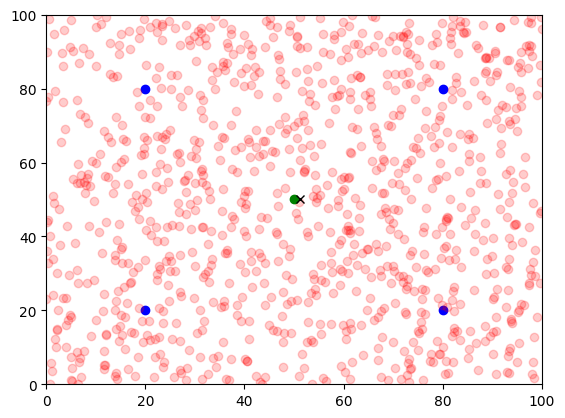

In [4]:
# Step 1: Import necessary libraries.
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Define the environment
world_size = 100
landmarks = [[20, 20], [80, 80], [20, 80], [80, 20]]

# Step 3: Implement Particle class
class Particle:
    def __init__(self):
        self.x = np.random.rand() * world_size
        self.y = np.random.rand() * world_size
        self.orientation = np.random.rand() * 2 * np.pi
        self.weight = 1.0

    def move(self, delta):
        self.orientation += delta[0]
        self.orientation %= 2 * np.pi
        self.x += delta[1] * np.cos(self.orientation)
        self.y += delta[1] * np.sin(self.orientation)
        self.x %= world_size
        self.y %= world_size

    def sense(self, landmarks):
        measurements = []
        for landmark in landmarks:
            dist = np.sqrt((self.x - landmark[0]) ** 2 + (self.y - landmark[1]) ** 2)
            measurements.append(dist)
        return measurements

    def measurement_prob(self, measurements, landmarks):
        prob = 1.0
        for i, landmark in enumerate(landmarks):
            dist = np.sqrt((self.x - landmark[0]) ** 2 + (self.y - landmark[1]) ** 2)
            prob *= self.gaussian(dist, 1.0, measurements[i])
        return prob

    @staticmethod
    def gaussian(mu, sigma, x):
        return np.exp(-((mu - x) ** 2) / (2 * sigma ** 2)) / np.sqrt(2 * np.pi * sigma ** 2)

# Step 4 : Number of particles
num_particles = 1000

# Step 5: Create particles
particles = [Particle() for _ in range(num_particles)]

# Step 6: Move particles
delta = [0.1, 5.0]
for particle in particles:
    particle.move(delta)

# Step 7: Simulate sensor reading from the "true" robot
true_position = Particle()
true_position.x = 50
true_position.y = 50
true_position.orientation = np.pi / 4
true_measurements = true_position.sense(landmarks)

# Step 8: Update weights based on sensor readings
for particle in particles:
    particle.weight = particle.measurement_prob(true_measurements, landmarks)

# Step 9: Normalize weights
weights = np.array([particle.weight for particle in particles])
weights /= np.sum(weights)

# Step 10: Resample particles based on weights
new_particles = np.random.choice(particles, num_particles, p=weights)
particles = [Particle() for _ in new_particles]

# Step 11: Estimate position
x_estimate = np.mean([particle.x for particle in particles])
y_estimate = np.mean([particle.y for particle in particles])
orientation_estimate = np.mean([particle.orientation for particle in particles])

# Step 12: Plotting the environment and particles
plt.figure()
for lm in landmarks:
    plt.plot(lm[0], lm[1], 'bo')
for p in particles:
    plt.plot(p.x, p.y, 'ro', alpha=0.2)
plt.plot(true_position.x, true_position.y, 'go')  # True position
plt.plot(x_estimate, y_estimate, 'kx')  # Estimated position

plt.xlim(0, world_size)
plt.ylim(0, world_size)
plt.show()


**9.3.1:Hands-on Session: Develop a PID Control Loop to Manage the Angle of a Robotic Joint and Simulate the Response of the Joint to Different Setpoints and Disturbances**


In [6]:
# Step 1: Import necessary libraries.
import time

# Step 2:Define the Process Variable (PV)
def update_process_variable(output, pv):
    # Simulate updating the process variable based on the controller output
    # This is where you'd interface with the actual robotic joint
    # For simulation purposes, let's assume each unit of 'output' changes 'pv' by 0.1 degrees
    pv += output * 0.1
    return pv

# Step 3: PID Calculations
def pid_controller(Kp, Ki, Kd, setpoint, pv, dt):
    # Initialize previous error and integral term
    prev_error = 0
    integral = 0

    # For simulation, run for a certain number of iterations instead of 'while True'
    for _ in range(100):  # Run for 100 or 1000 iterations
        error = setpoint - pv
        integral += error * dt
        derivative = (error - prev_error) / dt
        output = Kp * error + Ki * integral + Kd * derivative
        pv = update_process_variable(output, pv)
        prev_error = error

        # Print the process variable to see how it changes over time
        print(f"Process Variable: {pv:.2f} at iteration {_}")

        # Implement a delay matching your system's sampling rate
        time.sleep(dt)

# Step 4: Set the Parameters and for Example usage:
Kp = 0.1  # Proportional gain
Ki = 0.01  # Integral gain
Kd = 0.05  # Derivative gain
setpoint = 30  # Desired angle
pv = 0  # Initial angle
dt = 0.1  # Time interval in seconds

pid_controller(Kp, Ki, Kd, setpoint, pv, dt)


Process Variable: 1.80 at iteration 0
Process Variable: 2.00 at iteration 1
Process Variable: 2.28 at iteration 2
Process Variable: 2.55 at iteration 3
Process Variable: 2.83 at iteration 4
Process Variable: 3.10 at iteration 5
Process Variable: 3.38 at iteration 6
Process Variable: 3.65 at iteration 7
Process Variable: 3.93 at iteration 8
Process Variable: 4.20 at iteration 9
Process Variable: 4.48 at iteration 10
Process Variable: 4.75 at iteration 11
Process Variable: 5.02 at iteration 12
Process Variable: 5.30 at iteration 13
Process Variable: 5.57 at iteration 14
Process Variable: 5.84 at iteration 15
Process Variable: 6.12 at iteration 16
Process Variable: 6.39 at iteration 17
Process Variable: 6.66 at iteration 18
Process Variable: 6.93 at iteration 19
Process Variable: 7.21 at iteration 20
Process Variable: 7.48 at iteration 21
Process Variable: 7.75 at iteration 22
Process Variable: 8.02 at iteration 23
Process Variable: 8.29 at iteration 24
Process Variable: 8.56 at iteration

**9.3.2:Hands-on Session: Implement frame transformations for a multi-link manipulator. Use Denavit-Hartenberg (DH) parameters to set up and calculate forward kinematics**


In [8]:
#Step 1: Import necessary libraries.
import numpy as np
from sympy import symbols, Matrix, cos, sin

# Step 2: Define the DH parameters as symbols
theta1, theta2, d1, d2, a1, a2, alpha1, alpha2 = symbols('theta1 theta2 d1 d2 a1 a2 alpha1 alpha2')

# Step 3: Define the transformation matrix using DH parameters
def dh_transform(theta, d, a, alpha):
  return Matrix([
[cos(theta), -sin(theta)*cos(alpha),  sin(theta)*sin(alpha), a*cos(theta)],
[sin(theta),  cos(theta)*cos(alpha), -cos(theta)*sin(alpha), a*sin(theta)],
[0,           sin(alpha),             cos(alpha),            d],
[0,           0,                      0,                     1]
])

# Step 4:Define the DH parameters for each link
# These values should be replaced with the actual parameters of your manipulator
dh_parameters = {
theta1: 0,      # Joint angle for link 1
d1: 0,          # Offset for link 1
a1: 1,          # Link length for link 1
alpha1: 0,      # Link twist for link 1
theta2: 0,      # Joint angle for link 2
d2: 0,          # Offset for link 2
a2: 1,          # Link length for link 2
alpha2: 0       # Link twist for link 2
}

# Step 5: Calculate the transformation matrices for each link
T1 = dh_transform(theta1, d1, a1, alpha1)
T2 = dh_transform(theta2, d2, a2, alpha2)

# Step 6: Combine the transformations to get the end effector position
T_total = T1 * T2

# Step 7: Substitute the actual DH parameters
T_total = T_total.subs(dh_parameters)

# Step 8: Print the transformation matrix
print(T_total)


Matrix([[1, 0, 0, 2], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 1]])
